In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import warnings
import json
import pickle
import locale
from datetime import datetime
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [30]:
df = pd.read_csv('Data/Initial_data.csv')

In [31]:
df.head()

,House_Name,Location,Municipality,House_type,Release_form,Rooms,Floor,Total_no_Floors,Lift,Balcony,Living_area,Plot_area,Other_area,Built_on,Charge,Operating_cost,Sold_date,Starting_price,Price_Change,Final_Price
0,Hindergårdsgatan 23D,Rynningeåsen,Örebr,Lägenhet,Bostadsrätt,4,2,2,No,Yes,82.8,0.0,0.0,2011-present,4925.0,9823.0,2024-06-02,2.4,0.05,2.35
1,Sadelgatan 9,TäbyPark,Täb,Lägenhet,Bostadsrätt,2,4,7,Yes,No,55.0,0.0,0.0,2011-present,3484.0,6700.0,2024-06-02,2.7,-0.07,2.76
2,Sofielundsvägen 37,Blåsut,Stockholm,Lägenhet,Bostadsrätt,4,5,5,Yes,Yes,86.0,0.0,0.0,2011-present,6043.0,4500.0,2024-06-02,6.0,0.31,5.69
3,Lundavägen 77,Rostorp,Malm,Lägenhet,Bostadsrätt,2,1,3,No,No,92.8,0.0,0.0,1900-1950,3914.0,6360.0,2024-06-02,2.2,-0.30,2.49
4,Järnvägsgatan 11,Centrum,Ängelholm,Lägenhet,Bostadsrätt,3,2,4,Yes,Yes,83.5,0.0,0.0,1951-2000,4264.0,4680.0,2024-06-02,3.3,0.06,3.24


In [32]:
# Swedish locale for date parsing
locale.setlocale(locale.LC_ALL, 'sv_SE.UTF-8')


def parse_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    date_str = str(date_str).strip()
    try:
        return datetime.strptime(date_str, '%d %B %Y')
    except ValueError:
        return pd.NaT

# --- Numeric columns ---
numeric_cols_float = ['Living_area', 'Plot_area', 'Other_area', 'Charge', 'Operating_cost', 'Starting_price', 'Price_Change', 'Final_Price']
numeric_cols_int = ['Rooms', 'Floor', 'Total_no_Floors']

df[numeric_cols_float] = df[numeric_cols_float].apply(pd.to_numeric, errors='coerce')
df[numeric_cols_int] = df[numeric_cols_int].apply(pd.to_numeric, errors='coerce').astype('Int64')

# --- Date columns ---
df['Sold_date'] = df['Sold_date'].apply(parse_date)

# --- String cleanup ---
df['Location'] = df['Location'].str.replace(" ", "", regex=False)

# --- Categorical columns ---
categorical_cols = ['Location', 'Municipality', 'House_type', 'Release_form', 'Lift', 'Balcony', 'Built_on']
df[categorical_cols] = df[categorical_cols].astype('category')

print(df.dtypes)


House_Name                 object
Location                 category
Municipality             category
House_type               category
Release_form             category
Rooms                       Int64
Floor                       Int64
Total_no_Floors             Int64
Lift                     category
Balcony                  category
Living_area               float64
Plot_area                 float64
Other_area                float64
Built_on                 category
Charge                    float64
Operating_cost            float64
Sold_date          datetime64[ns]
Starting_price            float64
Price_Change              float64
Final_Price               float64
dtype: object


In [33]:
df.shape

(2531, 20)

There are a total of 2531 different houses which we were able to retrieve from website. It's not as big as the "Hemnet" website dataset, as the website only allows to scrap upto a certain number of pages. Which resulted in 2531 different houses. Each of these house have 20 different attributes. Lets look into each of the attributes and see what does each of these represent.

* House_Name - name of the house, mostly unique for each house (String type)
* Location - Location of the house (Categorical type)
* Municipality - Muncipality where the houce is located (Categorical type)
* House_type - type of the house in swedish, it can be one out of Lägenhet, Villa, Fritidshus, Parhus, Kedjehus and Tomot (Categorical type).
* Release_form - type of document grantting the transfer of rights. It can be one out of Bostadsrätt, Äganderätt, Annat, Tomträtt and Andelibostadsförening. (Categorical type) 
* Rooms - Number of rooms in the house (if applicable) (Numerical type).
* Floor - Which floor the house is located (if applicable) (Numerical type).
* Total_no_Floors - Totale number of floor in building (if applicable) (Numerical type).
* Lift - Indicate whether building have a lift or not. (Yes/No) (Categorical)
* Balcony - Indicate whether house have a balcony or not. (Yes/No) (if applicable) (Categorical)
* Living_area - Area of house in square meters. (Numerical type) 
* Plot_area - Plot area of property in square meters (if applicable). (Numerical type) 
* Other_area - Area of othe rplaces in houses, such as storage, garage or playing area (If applicable).
* Built_on - Indicate when does the house has built. It is divided in 5 category (Before 1900s, 1900-1950, 1951-2000, 2001-2010, 2011-present) (Categorical).
* Charge  - Monthly charge of the house(maintenance or service fees)(In SEK) (Numerical type).                 
* Operating_cost - yearly operating cost of property (Numerical type)
* Sold_date - Date on which house is sold (Date type)
* Starting_price - Intial asking price of the house (In million SEK) (Numerical type)
* Price_Change - Changes from initial to final price (In million SEK) (Numerical type)
* Final_Price -  The final selling price of the house (In million SEK) (Numerical type).


Out of these variable "Final price" will be the predictor variable. Lets analyse how each of the other attributes and decide which one to keep for the analysis. 
Such as "House_Name" is unique for most of the houses and ideally does not provide much value to Predictor. 


<Axes: xlabel='Location'>

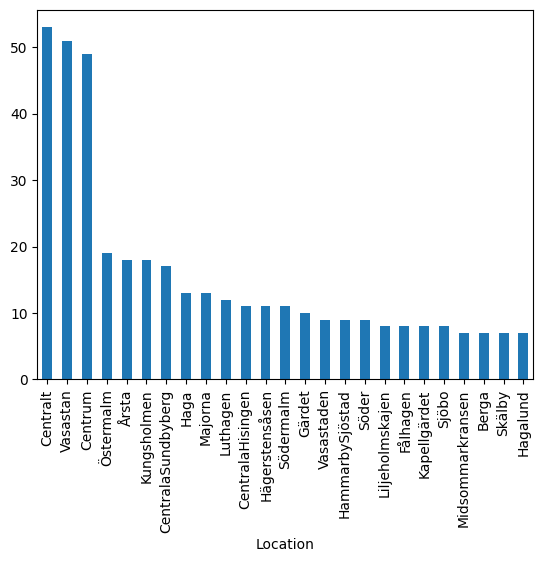

In [40]:
df["Location"].value_counts()[0:25].plot(kind = "bar")

Let's look at Municipality, where does the most pf these houses are situated. 

Text(0.5, 1.0, 'Share of sold properties in top 15 muncipality')

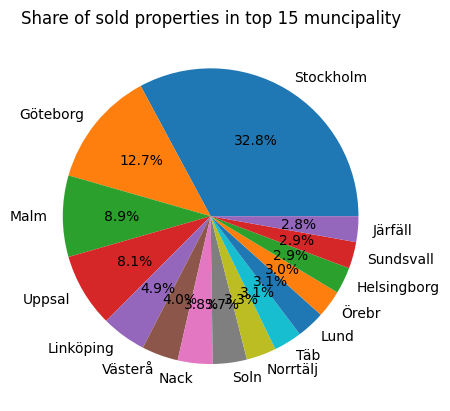

In [44]:
plt.pie(df['Municipality'].value_counts()[0:15], labels = df['Municipality'].value_counts()[0:15].index, autopct = '%1.1f%%')
plt.title('Share of sold properties in top 15 muncipality')


Stockholm, Göteborg, Malmö and Uppsala comparable high number of entries. Which make sence as these are the biggest cities in sweden.

<Axes: xlabel='House_type'>

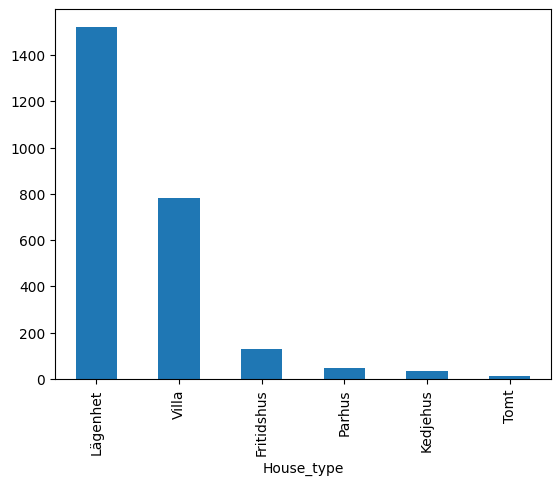

In [45]:
df['House_type'].value_counts().plot(kind ='bar')

Most of the entries are of type Lägenhet(Apartments) and Villa for rest, there are comparablly less entries. which make a complete sence as majprity of houses are either apartment or villas

Rooms, Balcony, Floor, Total_no_Floors and Lift are connected to apartment type, it make complete sense to keep these. But it also indice a bias in model as apartment types has more number of attributes compared to other types.


Next step will be to explore target variable which is "Final_Price" and see its distribution and relation which other variables.

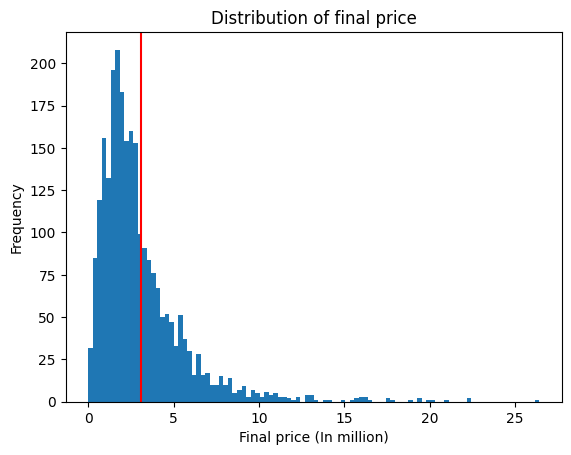

In [46]:
plt.hist(df['Final_Price'], bins = 100)
plt.xlabel('Final price (In million)')
plt.ylabel('Frequency')
plt.title('Distribution of final price')
plt.axvline(statistics.mean(df['Final_Price']), color='r')
plt.show()

The distribution of Final price is right schewed, Should consdier it while model training.

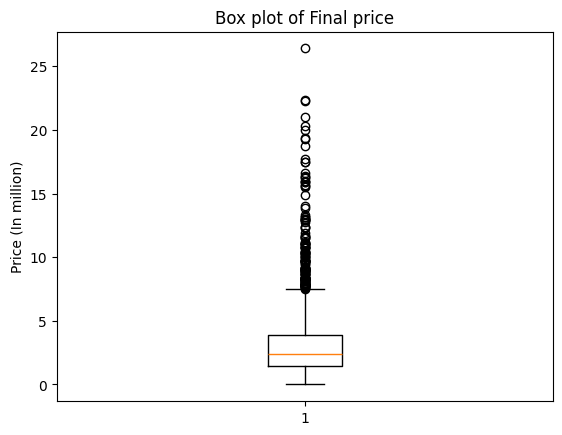

In [50]:
plt.boxplot(df['Final_Price'])
plt.ylabel('Price (In million)')
plt.title('Box plot of Final price')
plt.show()

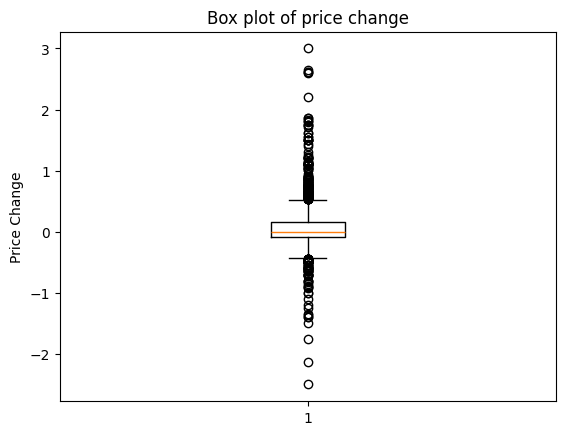

In [49]:
plt.boxplot(df['Price_Change'])
plt.ylabel('Price Change')
plt.title('Box plot of price change')
plt.show()

* Final price has many outliers with high price. and its mean is around 3 million, and it is highly skewed to the right with highes prices as close to 26 million.
* Price change has a well distributed box plot, with median around 0, which mean that usually to houses are sold at what they have asked, But the final price can different by +/- 1.


Let's explore the relation of Final _price with other attributes.

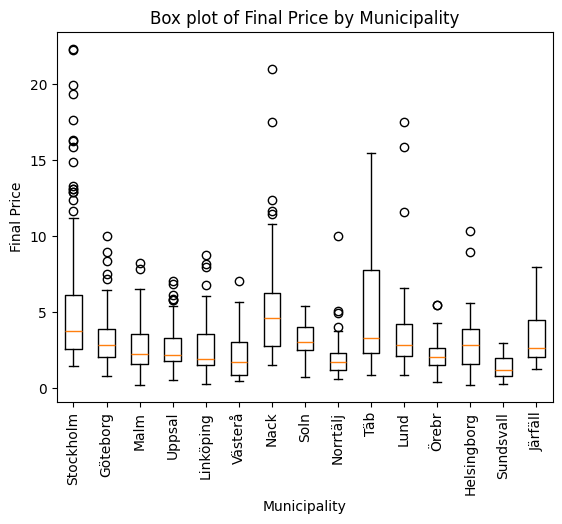

In [54]:
mp = df["Municipality"].value_counts()[0:15].index
data = [df[df['Municipality'] == m]['Final_Price'] for m in mp]


plt.boxplot(data, tick_labels = mp)
plt.xlabel('Municipality')
plt.ylabel('Final Price')
plt.title('Box plot of Final Price by Municipality')
plt.xticks(rotation = 90)
plt.show()

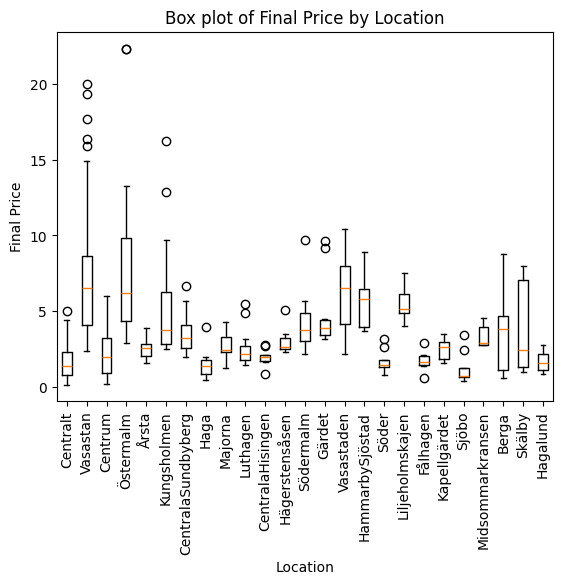

In [59]:
lp = df["Location"].value_counts()[0:25].index
data_lp = [df[df['Location'] == m]['Final_Price'] for m in lp]

# print(data_lp.shape)
plt.boxplot(data_lp, tick_labels = lp)
plt.xlabel('Location')
plt.ylabel('Final Price')
plt.title('Box plot of Final Price by Location')
plt.xticks(rotation = 90)
plt.show()

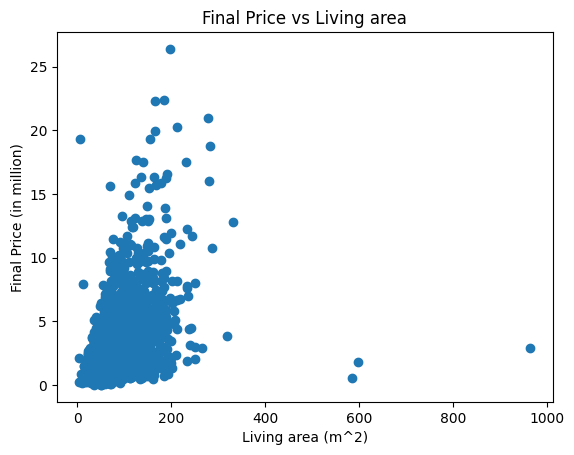

In [60]:
plt.scatter(x = df["Living_area"], y = df["Final_Price"])
plt.xlabel('Living area (m^2)')
plt.ylabel('Final Price (in million)')
plt.title('Final Price vs Living area')
plt.show()

A positive relation between these 2 variables.

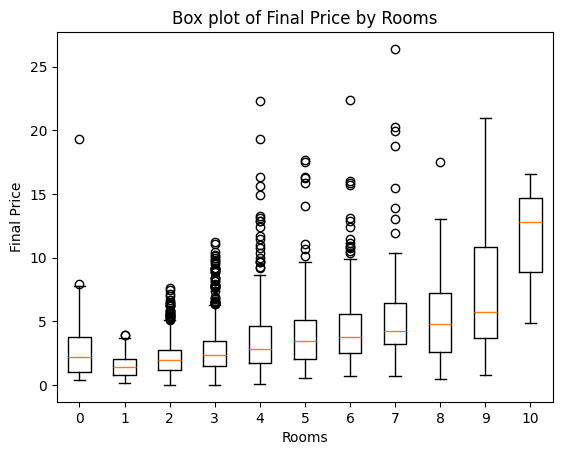

In [64]:
rooms = sorted(df["Rooms"].unique()) 
data = [df[df["Rooms"] == room]["Final_Price"] for room in rooms]

plt.boxplot(data, tick_labels=rooms) 
plt.xlabel('Rooms') 
plt.ylabel('Final Price') 
plt.title('Box plot of Final Price by Rooms')
plt.show()

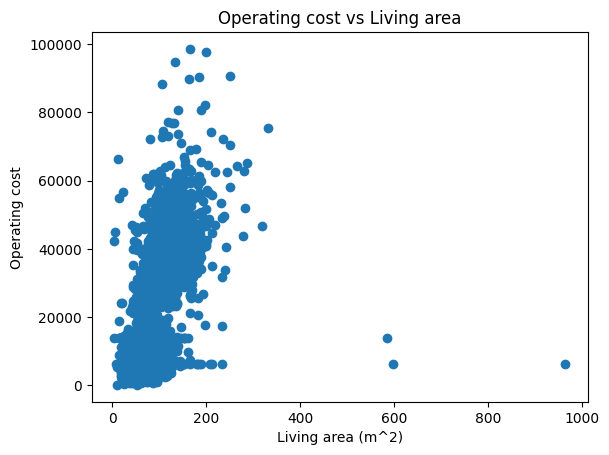

In [69]:
plt.scatter(y = df["Operating_cost"], x = df["Living_area"])
plt.xlabel('Living area (m^2)')
plt.ylabel('Operating cost')
plt.title('Operating cost vs Living area')
plt.show()

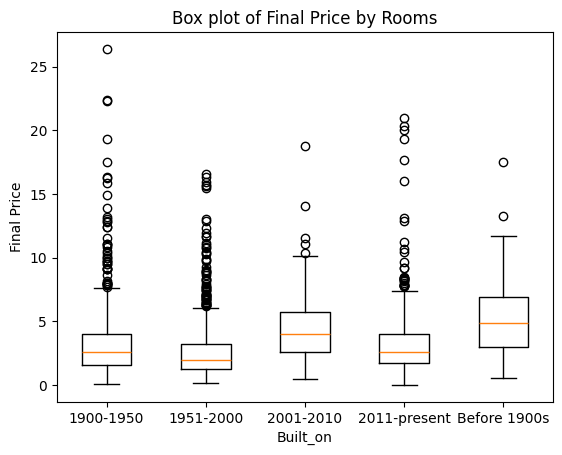

In [72]:
builts = sorted(df["Built_on"].unique())
data = [df[df["Built_on"] == built]["Final_Price"] for built in builts]

plt.boxplot(data, tick_labels=builts)
plt.xlabel('Built_on')
plt.ylabel('Final Price')
plt.title('Box plot of Final Price by Rooms')
plt.show()

The decision to divide the built on into 5 categories seems to be a fine decision. As there are some entries with 1700, which doesnt give a full picture.

In [75]:
df["Built_on"].value_counts()

Built_on
1951-2000       1079
2011-present     712
1900-1950        555
2001-2010        125
Before 1900s      60
Name: count, dtype: int64

In [78]:
df_f = df[['Built_on', 'Final_Price']]
df_f.groupby("Built_on", observed=False).agg("mean")

,Final_Price
Built_on,
1900-1950,3.409153
1951-2000,2.560677
2001-2010,4.584240
2011-present,3.131334
Before 1900s,5.283833


The mean Final price of various houses built at differnt time, with this it is evident that the Built_on has an affect on the final price, but there doesnt seems to be a positive correlation between them, which can be due tovarying price based on location and muncipality of property which we have found earlier. 

It is quite evident by analysing the data that "Living area", "Municipality", "Rooms", "Type of Home" and "Built_on " has an impact on the final price ofproperty. The other attributes needs to explored by adding/removing them, and accessing how it impact the performance of models.

In [79]:
dtype_dict_EDA = df.dtypes.apply(lambda x: x.name).to_dict()

with open('dtype_dict_EDA.json', 'w') as file:
    json.dump(dtype_dict_EDA, file)

df.to_csv("Data/final_data.csv")

In [137]:
df1 = pd.DataFrame([
  [1.0, 15],
  [2.0, 11],
  [3.0, 11],
  [4.0, 20],
], columns=["id", "age"])

In [138]:
df1

,id,age
0,1.0,15
1,2.0,11
2,3.0,11
3,4.0,20


In [140]:
df1.columns = ['student_id', 'Marks']

In [143]:
df1['student_id'].astype

dtype('float64')

In [136]:
df1

,student_id,Marks
0,1,15
1,2,11
2,3,11
3,4,20
